In [1]:
#Mounting Google Drive from Google Colab
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
#Changing the current working directory to the Google Drive
#%cd /content/drive/My Drive/MLDL2024_project1-Enrico

In [3]:
#!pip install -U fvcore

In [4]:
#Importing the necessary libraries
import os
import torch
import numpy as np
import torch.optim as optim
from torch.utils.data import DataLoader
from datasets.cityscapes import CityscapesCustom
from models.deeplabv2.deeplabv2 import get_deeplab_v2
from models.bisenet.build_bisenet import BiSeNet
from train import train_model
from utils import test_latency_FPS, test_FLOPs_params, plot_miou_over_epochs

In [5]:
#Set device agnostic code
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#Set the manual seeds
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(42)

#Set training parameters
cityscapes_height, cityscapes_width = (16, 32)
cityscapes_batch_size = 4

n_epochs = 30

class_names = ["road", "sidewalk", "building", "wall", "fence", "pole", "traffic_light", "traffic_sign",
                "vegetation", "terrain", "sky", "person", "rider", "car", "truck", "bus", "train",
                "motorcycle", "bicycle"
]

In [6]:
#Create Dataloaders for Cityscapes
cityscapes_dir = os.path.dirname(os.getcwd()) + '/Cityscapes/Cityspaces/'

cityscapes_train_dataset = CityscapesCustom(cityscapes_dir, 'train', cityscapes_height, cityscapes_width)
cityscapes_test_dataset = CityscapesCustom(cityscapes_dir, 'val', cityscapes_height, cityscapes_width)

cityscapes_train_dataloader = DataLoader(cityscapes_train_dataset, cityscapes_batch_size, shuffle=True)
cityscapes_test_dataloader = DataLoader(cityscapes_test_dataset, cityscapes_batch_size, shuffle=False)

print(f'Cityscapes (Train): {len(cityscapes_train_dataset)} images, divided into {len(cityscapes_train_dataloader)} batches of size {cityscapes_train_dataloader.batch_size}')
print(f'Cityscapes (Test): {len(cityscapes_test_dataset)} images, divided into {len(cityscapes_test_dataloader)} batches of size {cityscapes_test_dataloader.batch_size}')

Cityscapes (Train): 1572 images, divided into 393 batches of size 4
Cityscapes (Test): 500 images, divided into 125 batches of size 4


Deeplab pretraining loading...


Epoch 1/30  15s]
Train mIoU: 8.13%, Test mIoU: 7.33%
road: 59.19% sidewalk: 0.00% building: 35.09% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 16.13% terrain: 0.00% sky: 8.23% person: 0.00% rider: 0.00% car: 20.63% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 2/30  15s]
Train mIoU: 10.56%, Test mIoU: 8.88%
road: 72.97% sidewalk: 9.44% building: 41.90% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 29.84% terrain: 0.00% sky: 0.00% person: 0.00% rider: 0.00% car: 14.52% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 3/30  14s]
Train mIoU: 9.50%, Test mIoU: 7.10%
road: 81.65% sidewalk: 14.35% building: 36.05% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 2.86% terrain: 0.00% sky: 0.00% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 4/30  15s]
Train mIoU: 10.27%, Test mIoU: 7.10%
road: 83.16% sidewalk: 11.76% building: 38.78% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.00% terrain: 0.00% sky: 0.00% person: 0.00% rider: 0.00% car: 1.21% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 5/30  13s]
Train mIoU: 10.03%, Test mIoU: 6.50%
road: 65.25% sidewalk: 10.43% building: 29.48% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 7.19% terrain: 0.00% sky: 0.00% person: 0.00% rider: 0.00% car: 11.11% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 6/30  13s]
Train mIoU: 11.56%, Test mIoU: 7.68%
road: 83.24% sidewalk: 16.24% building: 39.59% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.00% terrain: 0.00% sky: 0.00% person: 0.00% rider: 0.00% car: 6.93% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 7/30  13s]
Train mIoU: 11.92%, Test mIoU: 9.54%
road: 84.06% sidewalk: 17.39% building: 42.11% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 32.69% terrain: 0.00% sky: 1.24% person: 0.00% rider: 0.00% car: 3.75% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 8/30  13s]
Train mIoU: 10.53%, Test mIoU: 10.55%
road: 81.30% sidewalk: 16.16% building: 40.32% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 17.14% terrain: 0.00% sky: 23.53% person: 0.00% rider: 0.00% car: 22.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 9/30  13s]
Train mIoU: 11.43%, Test mIoU: 9.41%
road: 78.12% sidewalk: 15.25% building: 40.44% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.61% terrain: 0.00% sky: 29.64% person: 0.00% rider: 0.00% car: 14.75% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 10/30  13s]
Train mIoU: 11.81%, Test mIoU: 13.76%
road: 82.07% sidewalk: 22.59% building: 49.62% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 45.69% terrain: 0.00% sky: 45.88% person: 0.00% rider: 0.00% car: 15.55% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 11/30  13s]
Train mIoU: 12.80%, Test mIoU: 11.49%
road: 81.08% sidewalk: 14.73% building: 47.83% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 37.81% terrain: 0.00% sky: 17.83% person: 0.00% rider: 0.00% car: 18.99% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 12/30  16s]
Train mIoU: 12.14%, Test mIoU: 13.32%
road: 82.83% sidewalk: 11.40% building: 49.52% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 40.97% terrain: 0.00% sky: 45.43% person: 0.00% rider: 0.00% car: 22.98% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 13/30  16s]
Train mIoU: 12.90%, Test mIoU: 14.50%
road: 82.90% sidewalk: 15.03% building: 59.25% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 58.86% terrain: 0.00% sky: 35.54% person: 0.00% rider: 0.00% car: 23.99% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 14/30  15s]
Train mIoU: 13.17%, Test mIoU: 14.68%
road: 85.04% sidewalk: 14.29% building: 60.20% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 51.75% terrain: 0.00% sky: 44.65% person: 0.00% rider: 0.00% car: 23.04% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 15/30  15s]
Train mIoU: 12.82%, Test mIoU: 14.48%
road: 84.40% sidewalk: 12.84% building: 55.42% wall: 0.00% fence: 5.71% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 51.78% terrain: 0.00% sky: 33.81% person: 0.00% rider: 0.00% car: 31.14% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 16/30  14s]
Train mIoU: 13.42%, Test mIoU: 14.81%
road: 83.73% sidewalk: 18.67% building: 55.81% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 57.66% terrain: 0.00% sky: 38.82% person: 1.61% rider: 0.00% car: 25.04% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 17/30  14s]
Train mIoU: 12.25%, Test mIoU: 13.32%
road: 81.06% sidewalk: 18.30% building: 44.69% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 47.52% terrain: 0.00% sky: 34.91% person: 5.26% rider: 0.00% car: 21.35% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 18/30  14s]
Train mIoU: 13.41%, Test mIoU: 14.98%
road: 82.37% sidewalk: 10.65% building: 55.31% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 52.36% terrain: 0.00% sky: 45.48% person: 9.52% rider: 0.00% car: 28.90% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 19/30  15s]
Train mIoU: 15.37%, Test mIoU: 15.28%
road: 83.65% sidewalk: 15.04% building: 61.51% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 57.66% terrain: 0.00% sky: 44.51% person: 0.00% rider: 0.00% car: 27.90% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 20/30  14s]
Train mIoU: 13.89%, Test mIoU: 15.51%
road: 81.46% sidewalk: 17.98% building: 61.77% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 59.79% terrain: 0.00% sky: 42.28% person: 0.00% rider: 0.00% car: 31.49% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 21/30  14s]
Train mIoU: 13.75%, Test mIoU: 15.37%
road: 82.47% sidewalk: 16.73% building: 61.79% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 58.84% terrain: 0.00% sky: 46.01% person: 0.00% rider: 0.00% car: 26.25% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 22/30  14s]
Train mIoU: 13.90%, Test mIoU: 14.89%
road: 82.78% sidewalk: 16.08% building: 59.20% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 52.45% terrain: 0.00% sky: 42.03% person: 0.00% rider: 0.00% car: 30.41% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 23/30  14s]
Train mIoU: 13.57%, Test mIoU: 14.49%
road: 83.41% sidewalk: 19.23% building: 57.89% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 59.37% terrain: 0.00% sky: 32.58% person: 0.00% rider: 0.00% car: 22.80% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 24/30  14s]
Train mIoU: 12.56%, Test mIoU: 14.29%
road: 84.00% sidewalk: 18.15% building: 51.28% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 60.38% terrain: 0.00% sky: 40.39% person: 0.00% rider: 0.00% car: 17.38% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 25/30  14s]
Train mIoU: 15.03%, Test mIoU: 13.67%
road: 82.96% sidewalk: 20.22% building: 52.98% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 45.61% terrain: 0.00% sky: 36.00% person: 0.00% rider: 0.00% car: 22.04% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 26/30  14s]
Train mIoU: 15.41%, Test mIoU: 14.23%
road: 79.86% sidewalk: 7.03% building: 59.36% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 50.41% terrain: 0.00% sky: 46.94% person: 0.00% rider: 0.00% car: 26.75% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 27/30  14s]
Train mIoU: 14.28%, Test mIoU: 14.37%
road: 77.81% sidewalk: 18.73% building: 56.93% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 48.84% terrain: 0.00% sky: 44.83% person: 0.00% rider: 0.00% car: 25.96% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 28/30  14s]
Train mIoU: 15.24%, Test mIoU: 15.52%
road: 82.62% sidewalk: 18.08% building: 58.23% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 58.09% terrain: 0.00% sky: 46.65% person: 0.00% rider: 0.00% car: 31.17% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 29/30  13s]
Train mIoU: 15.02%, Test mIoU: 15.82%
road: 84.20% sidewalk: 18.72% building: 58.56% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 59.15% terrain: 5.08% sky: 44.54% person: 0.00% rider: 0.00% car: 30.23% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 30/30  13s]
Train mIoU: 13.75%, Test mIoU: 14.57%
road: 83.42% sidewalk: 23.22% building: 54.06% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 47.98% terrain: 0.00% sky: 43.93% person: 0.00% rider: 0.00% car: 24.16% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 
Best mIoU: 15.82% at epoch 29
road: 84.20% sidewalk: 18.72% building: 58.56% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 59.15% terrain: 5.08% sky: 44.54% person: 0.00% rider: 0.00% car: 30.23% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

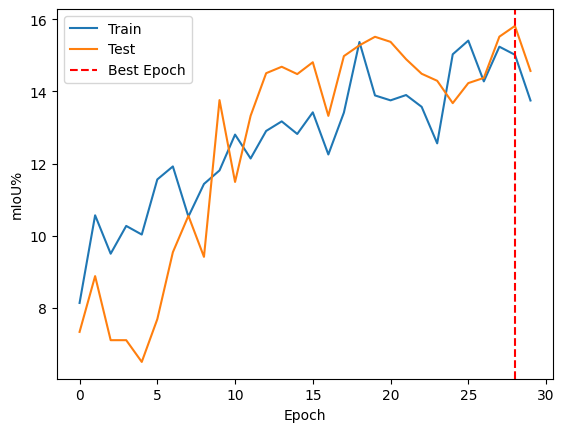

In [7]:
#Testing Classic semantic segmentation network

#Set up the model with the pretrained weights
DeepLabV2_model = get_deeplab_v2().to(device)

#Set up the loss function and the optimizer
DeepLabV2_criterion = torch.nn.CrossEntropyLoss(ignore_index=255)
DeepLabV2_optimizer = optim.Adam(DeepLabV2_model.parameters(), lr=1e-3)

#Test latency and FPS
#print(test_latency_FPS(DeepLabV2_model, device, cityscapes_height, cityscapes_width))

#Test FLOPs and number of parameters
#print(test_FLOPs_params(DeepLabV2_model, device, cityscapes_height, cityscapes_width))

#Train the model
all_train_miou, all_test_miou, best_epoch = train_model(DeepLabV2_model, DeepLabV2_criterion, DeepLabV2_optimizer,
            cityscapes_train_dataloader, cityscapes_test_dataloader, class_names, device, n_epochs,
            lr_schedule=False, model_name='DeepLabV2')

plot_miou_over_epochs(all_train_miou, all_test_miou, best_epoch)

Epoch 1/30  8s]
Train mIoU: 6.22%, Test mIoU: 5.13%
road: 83.39% sidewalk: 0.00% building: 0.00% wall: 0.00% fence: 1.65% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.00% terrain: 0.00% sky: 12.45% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 2/30  8s]
Train mIoU: 6.51%, Test mIoU: 5.35%
road: 72.42% sidewalk: 0.00% building: 0.00% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.37% traffic_sign: 0.00% vegetation: 0.00% terrain: 0.00% sky: 0.00% person: 0.00% rider: 0.00% car: 28.94% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 3/30  8s]
Train mIoU: 7.16%, Test mIoU: 6.48%
road: 72.39% sidewalk: 0.00% building: 27.69% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 1.50% terrain: 0.00% sky: 5.75% person: 0.00% rider: 0.00% car: 15.84% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 4/30  8s]
Train mIoU: 6.21%, Test mIoU: 7.46%
road: 78.62% sidewalk: 3.72% building: 39.28% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.00% terrain: 0.00% sky: 7.34% person: 0.00% rider: 0.00% car: 12.84% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 5/30  9s]
Train mIoU: 6.67%, Test mIoU: 7.34%
road: 80.04% sidewalk: 2.66% building: 23.91% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.00% terrain: 0.00% sky: 11.59% person: 0.00% rider: 0.00% car: 21.31% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 6/30  9s]
Train mIoU: 6.59%, Test mIoU: 7.18%
road: 81.99% sidewalk: 2.55% building: 37.82% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.00% terrain: 0.00% sky: 0.00% person: 0.00% rider: 0.00% car: 14.13% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 7/30  9s]
Train mIoU: 7.18%, Test mIoU: 6.20%
road: 83.17% sidewalk: 0.00% building: 3.48% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 30.97% terrain: 0.00% sky: 0.00% person: 0.00% rider: 0.00% car: 0.18% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 8/30  8s]
Train mIoU: 7.31%, Test mIoU: 6.69%
road: 83.71% sidewalk: 6.48% building: 36.41% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.00% terrain: 0.00% sky: 0.00% person: 0.00% rider: 0.00% car: 0.55% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 9/30  8s]
Train mIoU: 6.91%, Test mIoU: 6.41%
road: 82.49% sidewalk: 1.69% building: 37.64% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.00% terrain: 0.00% sky: 0.00% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 10/30  8s]
Train mIoU: 7.61%, Test mIoU: 5.94%
road: 80.51% sidewalk: 0.00% building: 1.19% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 30.61% terrain: 0.00% sky: 0.00% person: 0.00% rider: 0.00% car: 0.54% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 11/30  8s]
Train mIoU: 7.17%, Test mIoU: 6.40%
road: 81.99% sidewalk: 2.22% building: 37.35% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.00% terrain: 0.00% sky: 0.00% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 12/30  7s]
Train mIoU: 6.99%, Test mIoU: 7.18%
road: 82.69% sidewalk: 9.76% building: 37.69% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.00% terrain: 0.00% sky: 0.00% person: 0.00% rider: 0.00% car: 6.37% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 13/30  7s]
Train mIoU: 7.41%, Test mIoU: 7.15%
road: 83.09% sidewalk: 8.61% building: 36.84% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.00% terrain: 0.00% sky: 0.00% person: 0.00% rider: 0.00% car: 7.29% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 14/30  8s]
Train mIoU: 7.25%, Test mIoU: 7.27%
road: 83.55% sidewalk: 6.60% building: 37.50% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.00% terrain: 0.00% sky: 8.16% person: 0.00% rider: 0.00% car: 2.24% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 15/30  7s]
Train mIoU: 7.42%, Test mIoU: 7.32%
road: 83.43% sidewalk: 5.95% building: 35.84% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.00% terrain: 0.00% sky: 10.80% person: 0.00% rider: 0.00% car: 3.04% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 16/30  8s]
Train mIoU: 7.14%, Test mIoU: 7.14%
road: 83.63% sidewalk: 9.21% building: 37.51% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.00% terrain: 0.00% sky: 0.00% person: 0.00% rider: 0.00% car: 5.34% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 17/30  8s]
Train mIoU: 7.15%, Test mIoU: 8.63%
road: 83.63% sidewalk: 10.65% building: 35.45% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 4.40% terrain: 0.00% sky: 10.44% person: 0.00% rider: 0.00% car: 19.43% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 18/30  8s]
Train mIoU: 8.52%, Test mIoU: 8.55%
road: 83.90% sidewalk: 11.25% building: 37.38% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.00% terrain: 0.00% sky: 8.22% person: 0.00% rider: 0.00% car: 21.74% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 19/30  8s]
Train mIoU: 7.41%, Test mIoU: 7.28%
road: 83.89% sidewalk: 11.39% building: 38.03% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.00% terrain: 0.00% sky: 0.00% person: 0.00% rider: 0.00% car: 4.98% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 20/30  8s]
Train mIoU: 8.39%, Test mIoU: 7.25%
road: 82.64% sidewalk: 5.41% building: 34.63% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.00% terrain: 0.00% sky: 6.67% person: 0.00% rider: 0.00% car: 8.50% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 21/30  8s]
Train mIoU: 7.07%, Test mIoU: 8.15%
road: 83.47% sidewalk: 15.86% building: 36.44% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 1.74% terrain: 0.00% sky: 7.45% person: 0.00% rider: 0.00% car: 9.97% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 22/30  7s]
Train mIoU: 8.00%, Test mIoU: 10.14%
road: 83.36% sidewalk: 12.85% building: 35.40% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 35.49% terrain: 0.00% sky: 9.11% person: 0.00% rider: 0.00% car: 16.37% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 23/30  7s]
Train mIoU: 9.02%, Test mIoU: 8.11%
road: 83.63% sidewalk: 12.36% building: 37.89% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.00% terrain: 0.00% sky: 8.96% person: 0.00% rider: 0.00% car: 11.33% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 24/30  8s]
Train mIoU: 8.07%, Test mIoU: 7.97%
road: 82.95% sidewalk: 19.28% building: 36.88% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.00% terrain: 0.00% sky: 0.00% person: 0.00% rider: 0.00% car: 12.34% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 25/30  8s]
Train mIoU: 7.28%, Test mIoU: 7.68%
road: 83.92% sidewalk: 18.83% building: 36.83% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.00% terrain: 0.00% sky: 0.00% person: 0.00% rider: 0.00% car: 6.34% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 26/30  7s]
Train mIoU: 7.11%, Test mIoU: 8.64%
road: 82.28% sidewalk: 17.06% building: 38.67% wall: 0.00% fence: 2.74% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.00% terrain: 0.00% sky: 17.76% person: 0.00% rider: 0.00% car: 5.69% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 27/30  8s]
Train mIoU: 7.80%, Test mIoU: 8.47%
road: 82.87% sidewalk: 19.34% building: 38.19% wall: 0.00% fence: 5.71% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.00% terrain: 0.00% sky: 7.09% person: 0.00% rider: 0.00% car: 7.77% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 28/30  8s]
Train mIoU: 7.45%, Test mIoU: 8.67%
road: 81.07% sidewalk: 17.30% building: 38.62% wall: 0.00% fence: 4.55% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.00% terrain: 0.00% sky: 16.83% person: 0.00% rider: 0.00% car: 6.37% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 29/30  8s]
Train mIoU: 8.00%, Test mIoU: 8.91%
road: 82.10% sidewalk: 23.00% building: 35.84% wall: 0.00% fence: 3.57% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.00% terrain: 0.00% sky: 18.43% person: 0.00% rider: 0.00% car: 6.27% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 30/30  8s]
Train mIoU: 7.29%, Test mIoU: 8.35%
road: 83.22% sidewalk: 24.66% building: 35.75% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.00% terrain: 0.00% sky: 7.25% person: 0.00% rider: 0.00% car: 7.68% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 
Best mIoU: 10.14% at epoch 22
road: 83.36% sidewalk: 12.85% building: 35.40% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 35.49% terrain: 0.00% sky: 9.11% person: 0.00% rider: 0.00% car: 16.37% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

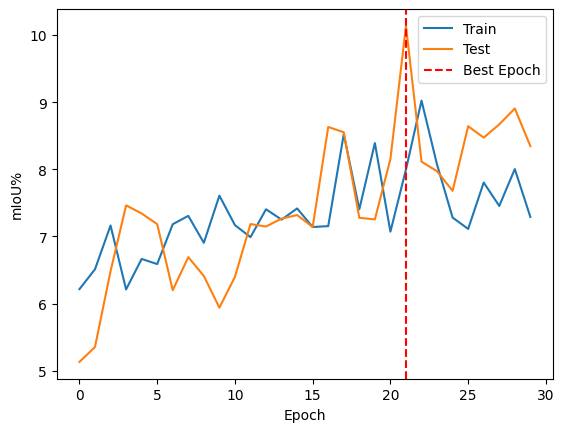

In [8]:
#Testing Real-Time semantic segmentation network

#Set up the model with the pretrained weights
BiSeNet_model = BiSeNet(num_classes=19, context_path='resnet18').to(device)

#Set up the loss function and the optimizer for BiSeNet
BiSeNet_criterion = torch.nn.CrossEntropyLoss(ignore_index=255)
BiSeNet_optimizer = torch.optim.SGD(BiSeNet_model.parameters(), lr=2.5e-2, momentum=0.9, weight_decay=1e-4)

#Test latency and FPS
#print(test_latency_FPS(BiSeNet_model, device, cityscapes_height, cityscapes_width))

#Test FLOPs and number of parameters
#print(test_FLOPs_params(BiSeNet_model, device, cityscapes_height, cityscapes_width))

#Train the model
all_train_miou, all_test_miou, best_epoch = train_model(BiSeNet_model, BiSeNet_criterion, BiSeNet_optimizer,
            cityscapes_train_dataloader, cityscapes_test_dataloader, class_names, device, n_epochs,
            lr_schedule=True, model_name='BiSeNet')

plot_miou_over_epochs(all_train_miou, all_test_miou, best_epoch)